<a href="https://colab.research.google.com/github/Yashwanthreddy1789/machine-learning/blob/main/credit_card_pynb_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
train_df = pd.read_csv('fraudTrain.csv', usecols=['amt', 'gender', 'is_fraud'])
test_df = pd.read_csv('fraudTest.csv', usecols=['amt', 'gender', 'is_fraud'])

# Preprocess the data
train_df['gender'] = train_df['gender'].map({'F': 0, 'M': 1})
test_df['gender'] = test_df['gender'].map({'F': 0, 'M': 1})

# Handle missing values if necessary
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

# Check unique values in the is_fraud column
print("Unique values in train is_fraud:", train_df['is_fraud'].unique())
print("Unique values in test is_fraud:", test_df['is_fraud'].unique())

# Convert target variable to numeric type, forcing errors to NaN
train_df['is_fraud'] = pd.to_numeric(train_df['is_fraud'], errors='coerce')
test_df['is_fraud'] = pd.to_numeric(test_df['is_fraud'], errors='coerce')

# Drop any rows with NaN in target variables after conversion
train_df.dropna(subset=['is_fraud'], inplace=True)
test_df.dropna(subset=['is_fraud'], inplace=True)

# Convert to int type
train_df['is_fraud'] = train_df['is_fraud'].astype(int)
test_df['is_fraud'] = test_df['is_fraud'].astype(int)

# Split the features and target variable
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']
X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_val_pred_logistic = logistic_model.predict(X_val)
y_test_pred_logistic = logistic_model.predict(X_test)

print("Logistic Regression Validation Classification Report:")
print(classification_report(y_val, y_val_pred_logistic))
print("Logistic Regression Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_logistic))

print("Logistic Regression Test Classification Report:")
print(classification_report(y_test, y_test_pred_logistic))
print("Logistic Regression Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_logistic))

# Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train,)
y_val_pred_tree = decision_tree_model.predict(X_val)
y_test_pred_tree = decision_tree_model.predict(X_test)

print("Decision Tree Validation Classification Report:")
print(classification_report(y_val, y_val_pred_tree))
print("Decision Tree Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_tree))

print("Decision Tree Test Classification Report:")
print(classification_report(y_test, y_test_pred_tree))
print("Decision Tree Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_tree))

# Random Forest with reduced number of trees
random_forest_model = RandomForestClassifier(n_estimators=50, random_state=42)
random_forest_model.fit(X_train, y_train)
y_val_pred_forest = random_forest_model.predict(X_val)
y_test_pred_forest = random_forest_model.predict(X_test)



print("Random Forest Validation Classification Report:")
print(classification_report(y_val, y_val_pred_forest))
print("Random Forest Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_forest))

print("Random Forest Test Classification Report:")
print(classification_report(y_test, y_test_pred_forest))
print("Random Forest Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_forest))


Unique values in train is_fraud: [0. 1.]
Unique values in test is_fraud: [0. 1.]
Logistic Regression Validation Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12332
           1       0.10      0.01      0.02       119

    accuracy                           0.99     12451
   macro avg       0.55      0.50      0.51     12451
weighted avg       0.98      0.99      0.99     12451

Logistic Regression Validation Confusion Matrix:
[[12323     9]
 [  118     1]]
Logistic Regression Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61967
           1       0.00      0.00      0.00       265

    accuracy                           0.99     62232
   macro avg       0.50      0.50      0.50     62232
weighted avg       0.99      0.99      0.99     62232

Logistic Regression Test Confusion Matrix:
[[61881    86]
 [  265     0]]
Decision 

In [4]:
# Collect evaluation metrics
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Validation Accuracy': [
        logistic_model.score(X_val, y_val),
        decision_tree_model.score(X_val, y_val),
        random_forest_model.score(X_val, y_val)
    ],
    'Test Accuracy': [
        logistic_model.score(X_test, y_test),
        decision_tree_model.score(X_test, y_test),
        random_forest_model.score(X_test, y_test)
    ],
}

# Convert to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Determine the best model based on test accuracy
best_model_index = results_df['Test Accuracy'].idxmax()
best_model = results_df.loc[best_model_index]

print("\nBest Model Based on Test Accuracy:")
print(best_model)


                 Model  Validation Accuracy  Test Accuracy
0  Logistic Regression             0.989800       0.994360
1        Decision Tree             0.989479       0.992480
2        Random Forest             0.989559       0.992592

Best Model Based on Test Accuracy:
Model                  Logistic Regression
Validation Accuracy                 0.9898
Test Accuracy                      0.99436
Name: 0, dtype: object


                 Model  Validation Accuracy  Test Accuracy
0  Logistic Regression             0.993576       0.995489
1        Decision Tree             0.993399       0.994916
2        Random Forest             0.993368       0.994860

Best Model Based on Test Accuracy:
Model                  Logistic Regression
Validation Accuracy               0.993576
Test Accuracy                     0.995489
Name: 0, dtype: object


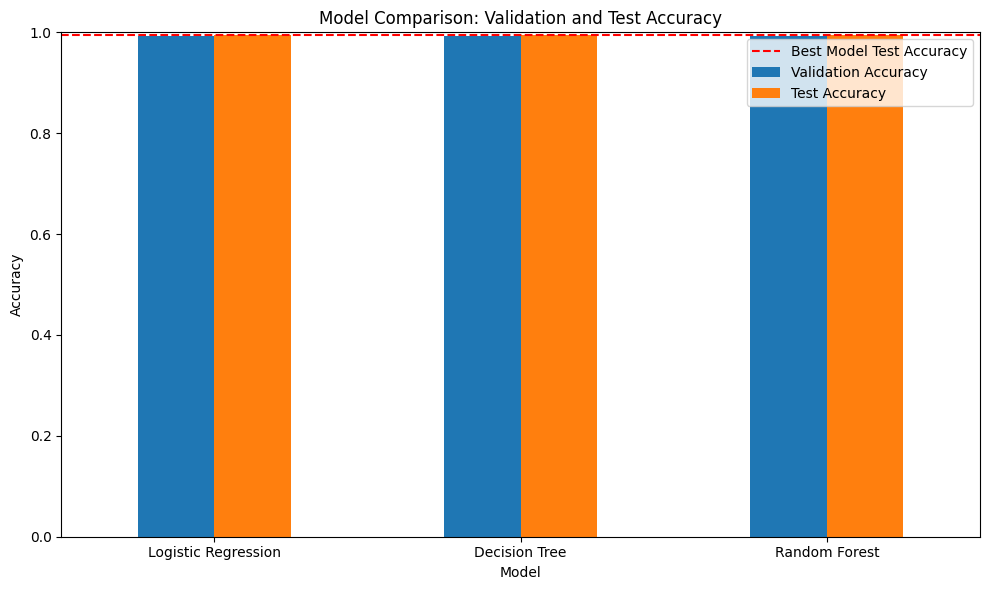

In [ ]:
import matplotlib.pyplot as plt

# Collect evaluation metrics
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Validation Accuracy': [
        logistic_model.score(X_val, y_val),
        decision_tree_model.score(X_val, y_val),
        random_forest_model.score(X_val, y_val)
    ],
    'Test Accuracy': [
        logistic_model.score(X_test, y_test),
        decision_tree_model.score(X_test, y_test),
        random_forest_model.score(X_test, y_test)
    ],
}

# Convert to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Determine the best model based on test accuracy
best_model_index = results_df['Test Accuracy'].idxmax()
best_model = results_df.loc[best_model_index]

print("\nBest Model Based on Test Accuracy:")
print(best_model)

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))
results_df.set_index('Model').plot(kind='bar', ax=ax)
plt.title('Model Comparison: Validation and Test Accuracy')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.axhline(y=best_model['Test Accuracy'], color='r', linestyle='--', label='Best Model Test Accuracy')
plt.legend()
plt.tight_layout()
plt.show()
